In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install -U scikit-learn

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np 
import os
import matplotlib.colors as mcl
import random
import matplotlib.pyplot as plt

In [13]:
def get_dimension():
    while True:
        dimension=int(input('Enter 2 for 2 Dimension and 3 for 3 Dimensions: '))
        if dimension==2 or dimension==3: 
            break 
        else: 
            print('Creator\'s note Please give 2 or 3 as input as it works on these 2 only (for now) \n')

    return dimension

def get_topics(dimension):
    topics=[]
    if dimension==2:
        topics=['Math','Science']
    else: 
        topics=['Math','Science','Literature']
    
    return topics

def get_students(number_of_students):
    students=[]
    for i in range(0,number_of_students):
        students.append(input(f'Enter name of the {i+1} student:  '))
    return students

def get_column_names(topics):
    columns=['Student']
    for i in topics: 
        columns.append(i)
    return columns

def get_initial_data_frame(students,columns):
    df=pd.DataFrame(columns=columns)
    df['Student']=students
    for i in columns[1:]: 
        df[i]=[random.randrange(30,100) for number in range(len(students))]
    return df
def get_data_frame(number_of_students,dimension):
    topics=get_topics(dimension)
    students=get_students(number_of_students)
    columns=get_column_names(topics)
    data_df=get_initial_data_frame(students,columns)
    return data_df
    

def saving_dataframe_and_loading_latest_dataframe(data_df):
        
    if len(data_df.columns)==3:
        print('Saving to \'Dataset 2D\'')
        if 'Dataset_2D.csv' in os.listdir(os.getcwd()):
            data_df.to_csv('Dataset_2D.csv',mode='a',index=False,header=False)
        else: 
            data_df.to_csv('Dataset_2D.csv',mode='a',index=False,header=True)

        data_df=pd.read_csv('Dataset_2D.csv')

    else: 
        print('Saving to \'Dataset 2D\'')
        if "Dataset_3D.csv" in os.listdir(os.getcwd()):
            data_df.to_csv('Dataset_3D.csv',mode='a',index=False,header=False)
        else:
            data_df.to_csv('Dataset_3D.csv',mode='a',index=False,header=True)

        data_df=pd.read_csv('Dataset_3D.csv')
    
    return data_df

In [14]:
dimension=get_dimension()
number_of_students=int(input('Enter number of students to work with: '))

data_df=get_data_frame(number_of_students,dimension)
data_df=saving_dataframe_and_loading_latest_dataframe(data_df)

print('Numpy array: ')
data_np=(data_df.drop(columns=['Student'])).to_numpy()
print(data_np)
print('Data Frame: ')
data_df

Enter 2 for 2 Dimension and 3 for 3 Dimensions: 2
Enter number of students to work with: 25
Enter name of the 1 student:  aabinash
Enter name of the 2 student:  ankit
Enter name of the 3 student:  roshan
Enter name of the 4 student:  rujan
Enter name of the 5 student:  rijan
Enter name of the 6 student:  raman
Enter name of the 7 student:  ramesh
Enter name of the 8 student:  rahul
Enter name of the 9 student:  ram
Enter name of the 10 student:  shyam
Enter name of the 11 student:  hari
Enter name of the 12 student:  santosh
Enter name of the 13 student:  unesh
Enter name of the 14 student:  prasanna
Enter name of the 15 student:  pralad
Enter name of the 16 student:  sworup
Enter name of the 17 student:  ak
Enter name of the 18 student:  abhishek
Enter name of the 19 student:  ashim
Enter name of the 20 student:  geeta
Enter name of the 21 student:  rita
Enter name of the 22 student:  santi
Enter name of the 23 student:  lalita
Enter name of the 24 student:  usha
Enter name of the 25 

,Student,Math,Science
0,aabinash,42,51
1,ankit,61,91
2,roshan,91,93
3,rujan,98,46
4,rijan,58,39
5,raman,67,58
6,ramesh,47,56
7,rahul,58,95
8,ram,84,46
9,shyam,64,48


<h3>K means clustering</h3>

In [15]:
clustering_model=KMeans(n_clusters=5).fit(data_np)
cluster_op=clustering_model.predict(data_np)
data_df['Clusters']=cluster_op
data_df.to_csv('output.csv',index=False)

C:\Users\Hp\anaconda3\envs\abinash\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
def plot_all(topics,data_df,color_list,flag):
    if flag==3:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    
    for i in range(data_df.shape[0]):
        c=data_df.at[i,'Clusters']
        x_pt=data_df.at[i,topics[0]]
        y_pt=data_df.at[i,topics[1]]
        if flag==3:
            z_pt=data_df.at[i,topics[2]]
            ax.scatter(x_pt,y_pt,z_pt,color=color_list[c])
        else: 
            plt.scatter(x=x_pt,y=y_pt,color=color_list[c])

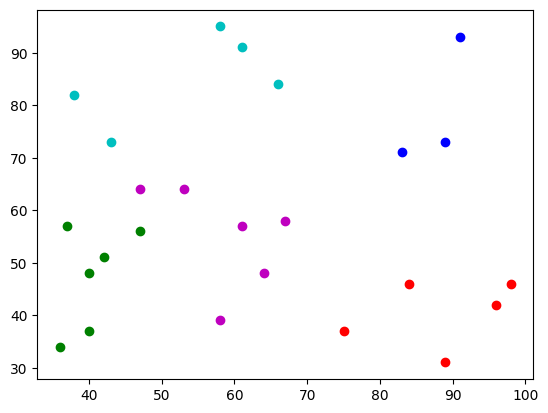

In [20]:
topics=get_topics(len(data_df.columns)-2)
color_list=list(mcl.BASE_COLORS.values())

if len(topics)==3:
    plot_all(topics,data_df,color_list,3)
else:
    plot_all(topics,data_df,color_list,2)    